# Single step agent with checkpointing
Implementation of a single step agent with Langgraph *StateGraph*

**Note**
Requires langgraph to be installed.

%pip install -U langgraph

In [1]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing import TypedDict
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.graph.message import add_messages
from IPython.display import Image, display


## Setup LLM

In [2]:
from dotenv import load_dotenv
import sys
import json

from langchain.prompts import PromptTemplate

# Load the file that contains the API keys - OPENAI_API_KEY
load_dotenv('C:\\Users\\raj\\.jupyter\\.env')

# setting path
sys.path.append('../')

from utils.create_llm import create_gpt_llm, create_anthropic_llm, create_ai21_llm, create_cohere_llm, create_hugging_face_llm

# Use MistralAI
# A Gated model on HuggingFace
model_id = 'distilbert/distilbert-base-cased-distilled-squad'
llm = create_cohere_llm() #create_hugging_face_llm(repo_id=model_id, args={"max_new_tokens":1024})

C:\Users\raj\anaconda3\envs\genai-course\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 0.3.0. An updated version of the class exists in the langchain-cohere package and should be used instead. To use it run `pip install -U langchain-cohere` and import as `from langchain_cohere import Cohere`.
  warn_deprecated(


## Utility function

In [3]:
def pretty_print_messages(response):
    # print(messages)
    messages = response["messages"]
    # return
    for message in messages:
        print(message.content)
        print("--------------------")

## 1. Setup StateGraph without checkpoint

**Annotated** in python allows developers to declare the type of a reference and provide additional information related to it. In this code the LangGraph is getting informed that *messages* is a list whose behavior is governed by the function *add_messages*. 
```
messages : Annotated[list, add_messages]
```

In [4]:

# The messages key is annotated with the add_messages function, which tells LangGraph to append new messages to the existing list, 
# rather than overwriting it.
class AppState(TypedDict):
    messages : Annotated[list, add_messages]

def test_llm(state : AppState):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}



In [5]:
### Add nodes, edges & compile

In [6]:
# from langgraph.graph import START, END

graph_builder = StateGraph(AppState)

graph_builder.add_node("tester", test_llm)

# graph_builder.add_edge(START, "tester)

# If you don't set this a ValueError is thrown
graph_builder.set_entry_point("tester")

# graph_builder.add_edge(END, "tester")
graph_builder.set_finish_point("tester")

graph = graph_builder.compile()

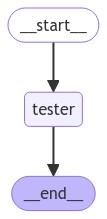

In [7]:
# This is to visualize the state machine
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 2. Test 

In [8]:
# Question: 1
response = graph.invoke({"messages":[HumanMessage("what is retrieval augmented generation?")]})

pretty_print_messages(response)

what is retrieval augmented generation?
--------------------
 Retrieval-Augmented Generation (RAG) is a process that involves using pre-existing information to create new information. In general, it involves three steps: retrieval, augmentation, and generation. Here's a brief overview:

1. Retrieval: This step involves collecting and retrieving relevant data from existing sources to serve as the basis for the generation process.  This could include databases, document corpora, or even web sources. 

2. Augmentation: In this step, the retrieved data is then manipulated, enhanced, or modified to create a richer set of information. This can involve merging or blending information, adding logical extensions, or creating hybrids of different sources. It aims to refine and expand the retrieved data to provide more diverse sources and ideas for the generation process. 

3. Generation: Finally, the augmented data is then used as the input for an artificial intelligence (AI) model that produces

In [9]:
# Question: 2
response = graph.invoke({"messages":[HumanMessage("how is it different than fine tuning?")]})

pretty_print_messages(response)

how is it different than fine tuning?
--------------------
 They are two different concepts, although they may be related.

**Training** in general refers to the process of teaching a model to learn and make predictions based on input data. The process of training comprises multiple steps, which include the following:

- Data preparation: Preparing the data to feed it to the model is one of the critical steps of the process. The data may need to be cleaned and preprocessed to remove irrelevant information, noise, or duplicated entries.
- Supervised learning: This is the most common type of machine learning algorithm that learns from artificially made examples. It comprises two main steps: assigning labels to the data and using the data to infer the logic of relationships between the labels and features to produce a valid output. This step may need multiple iterations to achieve the desired results and meet the objectives. 
- Evaluation: During the training process, the work of the mode

## 3. Create StateGraph with MemorySaver checkpointing
https://langchain-ai.github.io/langgraph/reference/checkpoints/

You can compile any LangGraph workflow with a CheckPointer to give your agent "memory" by persisting its state.

This permits things like:

* 
Remembering things across multiple interaction* s
Interrupting to wait for user inp* ut
Resilience for long-running, error-prone age* nts
Time travel retry and branch from a previous checkpoint

In [10]:
from langgraph.checkpoint import MemorySaver

# Initialize memory to persist state between graph runs
checkpointer = MemorySaver()

graph = graph_builder.compile(checkpointer=checkpointer)

## 4. Test

In [11]:
# Question 1
response = graph.invoke(
    {"messages":[HumanMessage("what is retrieval augmented generation?")]},
    config={"configurable": {"thread_id": 42}}
)

pretty_print_messages(response)

what is retrieval augmented generation?
--------------------
 Retrieval-Augmented Generation (RAG) is a methodology that combines the benefits of both generative and retrieval-based models to create more realistic and accurate synthetic media. 

Here's a high-level overview of how RAG works:

1. Retrieval Phase: 
    - Given a description or prompt, a retrieval model is used to search and retrieve relevant examples from a dataset. 
    - The retrieval model sorts through thousands of images or videos to find the most similar and pertinent examples that match the description. 
2. Generation Phase: 
    - Once the retrieval model identifies the most appropriate media examples, a generative model takes those examples and modifies or synthesizes new content. 
    - The generative model uses the retrieved examples as a guide to maintain the relevant stylistic constraints and content constraints while modifying the aspects of the retrieved media to match the prompt. 

This process allows the

In [12]:
# Question 2
response = graph.invoke(
    {"messages":[HumanMessage("how is it different than fine tuning?")]},
    config={"configurable": {"thread_id": 42}}
)

pretty_print_messages(response)

what is retrieval augmented generation?
--------------------
 Retrieval-Augmented Generation (RAG) is a methodology that combines the benefits of both generative and retrieval-based models to create more realistic and accurate synthetic media. 

Here's a high-level overview of how RAG works:

1. Retrieval Phase: 
    - Given a description or prompt, a retrieval model is used to search and retrieve relevant examples from a dataset. 
    - The retrieval model sorts through thousands of images or videos to find the most similar and pertinent examples that match the description. 
2. Generation Phase: 
    - Once the retrieval model identifies the most appropriate media examples, a generative model takes those examples and modifies or synthesizes new content. 
    - The generative model uses the retrieved examples as a guide to maintain the relevant stylistic constraints and content constraints while modifying the aspects of the retrieved media to match the prompt. 

This process allows the